### Import packages

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math

### Load data

In [25]:
path = '/Users/jooyong/github_locals/Soccer_Player_Recommendation_Service/data/match_details(from_Transfermarket)/Seria_A_match_details/'
file_list = os.listdir(path)

Seria_A_matches = pd.DataFrame()
for file in file_list:

    filepath = path + file
    Seria_A_matches = pd.concat([Seria_A_matches, pd.read_json(filepath, lines=True)], axis=0)

In [26]:
Seria_A_matches.head(5)

,match_general_info,team_details,event_details
0,"{'day': 'Fri', 'date': '2/9/18', 'starttime': ...","{'home': {'name': 'ACF Fiorentina', 'rank': '1...","{'home': {'card': [{'name': 'Gil Dias', 'card_..."
1,"{'day': 'Sat', 'date': '2/10/18', 'starttime':...","{'home': {'name': 'SPAL 2013', 'rank': '18', '...","{'home': {'card': [{'name': 'Lorenco Simic', '..."
2,"{'day': 'Sat', 'date': '2/10/18', 'starttime':...","{'home': {'name': 'FC Crotone', 'rank': '17', ...",{'home': {'goal': [{'scorer': 'Rolando Mandrag...
3,"{'day': 'Sat', 'date': '2/10/18', 'starttime':...","{'home': {'name': 'SSC Napoli', 'rank': '1', '...","{'home': {'goal': [{'scorer': 'José Callejón',..."
4,"{'day': 'Sun', 'date': '2/11/18', 'starttime':...","{'home': {'name': 'US Sassuolo', 'rank': '15',...",{'home': {'sub': [{'subs_in': 'Alessandro Matr...


In [27]:
print('number of matches from season 2010-2011 to the date the data scraped:', len(Seria_A_matches))

number of matches from season 2010-2011 to the date the data scraped: 4980


### Match general information analysis
#### 1. Observe initial form

In [28]:
match_general_info = pd.DataFrame(Seria_A_matches['match_general_info'].to_list())

In [29]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score
0,Fri,2/9/18,8:45 PM,Artemio Franchi,32.563,Marco Guida,0:2
1,Sat,2/10/18,3:00 PM,Paolo Mazza,13.100,Maurizio Mariani,0:4
2,Sat,2/10/18,6:00 PM,Ezio Scida,8.795,Davide Massa,1:1
3,Sat,2/10/18,8:45 PM,Stadio Diego Armando Maradona,32.940,Luca Banti,4:1
4,Sun,2/11/18,12:30 PM,Mapei Stadium - Città del Tricolore,8.319,Paolo Silvio Mazzoleni,0:0


In [30]:
for column in match_general_info.columns:

    print(column, match_general_info[column].isnull().sum())


day 0
date 0
starttime 0
stadium 0
attendance 499
referee 0
score 0


Attendance data need to be observed after converting string type date to datetype date to check why there are many null values.

#### 2. Data pre-processing

In [31]:
def home_score(row):
    try:
        temp = row.split(':')
        home = int(temp[0])
    except:
        home = row
    return home
def away_score(row):
    try:
        temp = row.split(':')
        away = int(temp[1])
    except:
        away = row
    return away

match_general_info['home_score'] = match_general_info['score'].apply(lambda x: home_score(x))
match_general_info['away_score'] = match_general_info['score'].apply(lambda x: away_score(x))

match_general_info['date'] = pd.to_datetime(match_general_info['date'])
match_general_info['starttime'] = pd.to_datetime(match_general_info['starttime']).apply(lambda x: datetime.time(x))

In [32]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
0,Fri,2018-02-09,20:45:00,Artemio Franchi,32.563,Marco Guida,0:2,0,2
1,Sat,2018-02-10,15:00:00,Paolo Mazza,13.100,Maurizio Mariani,0:4,0,4
2,Sat,2018-02-10,18:00:00,Ezio Scida,8.795,Davide Massa,1:1,1,1
3,Sat,2018-02-10,20:45:00,Stadio Diego Armando Maradona,32.940,Luca Banti,4:1,4,1
4,Sun,2018-02-11,12:30:00,Mapei Stadium - Città del Tricolore,8.319,Paolo Silvio Mazzoleni,0:0,0,0


In [33]:
# cases having null value for attendance
match_general_info[match_general_info['attendance'].isnull()]

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
165,Sun,2018-08-26,20:30:00,Stadio Olimpico Grande Torino,None,Gianluca Manganiello,0:0,0,0
342,Sat,2019-01-19,20:30:00,Giuseppe Meazza,None,Luca Pairetto,0:0,0,0
776,Sat,2020-06-20,19:30:00,Stadio Olimpico Grande Torino,None,Massimiliano Irrati,1:1,1,1
777,Sat,2020-06-20,21:45:00,Marcantonio Bentegodi,None,Gianluca Manganiello,2:1,2,1
778,Sun,2020-06-21,19:30:00,Gewiss Stadium,None,Daniele Chiffi,4:1,4,1
...,...,...,...,...,...,...,...,...,...
1289,Sun,2021-05-23,20:45:00,Stadio Diego Armando Maradona,None,Daniele Chiffi,1:1,1,1
2085,Sun,2012-09-23,15:00:00,Stadio Is Arenas,None,Antonio Giannoccaro,0:3,0,3
4920,Wed,2012-05-02,20:45:00,Mario Rigamonti,None,Paolo Silvio Mazzoleni,2:1,2,1
4942,Sun,2012-05-13,20:45:00,Luigi Ferraris,None,Paolo Valeri,2:0,2,0


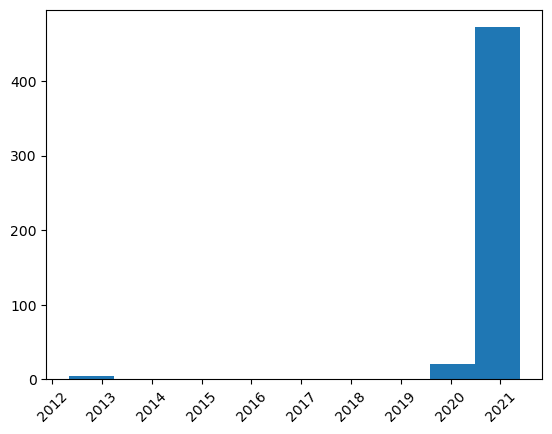

In [34]:
plt.hist(match_general_info[match_general_info['attendance'].isnull()]['date'])
plt.xticks(rotation = 45)
plt.show()

Most of null cases for the attendance locate season 2020-2021, and it could be because of the pendemic. <br>
There were many games with no attendance during the pendamic, so 0 will replace null values for attendance. <br>
For other cases, average number of attendance for the stadium will replace null values.

Null value attendance of matches bewtween 05.01.2020 and 07.01.2021 will be replaced with 0.

In [35]:
match_general_info.loc[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01'), 'attendance'] = \
    match_general_info[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01')]['attendance'].fillna('0')
match_general_info[match_general_info['attendance'].isnull()][['date', 'stadium']]

,date,stadium
165,2018-08-26,Stadio Olimpico Grande Torino
342,2019-01-19,Giuseppe Meazza
784,2020-03-08,Ennio Tardini
785,2020-03-08,Giuseppe Meazza
786,2020-03-08,Luigi Ferraris
787,2020-03-08,Dacia Arena
788,2020-03-08,Allianz Stadium
789,2020-03-09,Mapei Stadium - Città del Tricolore
2085,2012-09-23,Stadio Is Arenas
4920,2012-05-02,Mario Rigamonti


In [36]:
# save indices for missing attendance samples to later check
attendance_missing_index = match_general_info[match_general_info['attendance'].isnull()].index

for stadium in set(match_general_info[match_general_info['attendance'].isnull()]['stadium']):

    average = pd.to_numeric(match_general_info[match_general_info['stadium']==stadium]['attendance'].dropna().apply(lambda x: x.replace('.', ''))).mean()
    if math.isnan(average)!=True:
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(round(average)))
    
    else:
        print('cannot find an average, missing value filled out manually:', stadium)

match_general_info['attendance'] = pd.to_numeric(match_general_info['attendance'].apply(lambda x: x.replace('.', ''))).apply(lambda x: round(x))

In [37]:
# to check missing attendances are filled out or not
for one_index in attendance_missing_index:
    print(match_general_info.loc[one_index]['date'].date(), match_general_info.loc[one_index]['attendance'])

2018-08-26 15547
2019-01-19 44951
2020-03-08 11705
2020-03-08 44951
2020-03-08 17987
2020-03-08 15047
2020-03-08 33246
2020-03-09 10424
2012-09-23 7516
2012-05-02 9655
2012-05-13 17987
2012-09-02 10445


As we can see above, missing attendance of matches after 07.01.2021 (no pendamic period) are filled with averages.

In [38]:
for column in match_general_info.columns:
    print(column, match_general_info[column].isnull().sum())

day 0
date 0
starttime 0
stadium 0
attendance 0
referee 0
score 0
home_score 0
away_score 0


Now, we don't have null values anymore.

#### 3. Data Quality Check - Check if there are inappropriate values
##### - categorical data

In [39]:
match_general_info.describe(include=['object'])

,day,starttime,stadium,referee,score
count,4980,4980,4980,4980,4980
unique,7,27,39,97,49
top,Sun,15:00:00,Giuseppe Meazza,Daniele Orsato,1:1
freq,2755,1812,497,218,579


In [40]:
match_general_info.describe(include=['datetime'], datetime_is_numeric=True)

,date
count,4980
mean,2017-01-26 22:49:09.397590016
min,2010-08-28 00:00:00
25%,2013-11-01 12:00:00
50%,2017-01-22 00:00:00
75%,2020-07-08 00:00:00
max,2023-09-03 00:00:00


In [41]:
match_general_info['day'].value_counts(dropna=False)

Sun    2755
Sat    1173
Wed     455
Mon     278
Fri     136
Tue     104
Thu      79
Name: day, dtype: int64

In [42]:
match_general_info['date'].value_counts(dropna=False)

2012-09-23    11
2021-01-06    10
2018-03-31    10
2011-01-09    10
2014-04-19    10
              ..
2014-04-02     1
2015-05-25     1
2022-02-28     1
2022-03-04     1
2017-04-29     1
Name: date, Length: 1357, dtype: int64

In [43]:
match_general_info['starttime'].value_counts(dropna=False)

15:00:00    1812
20:45:00    1520
18:00:00     675
12:30:00     372
18:30:00     159
20:30:00     123
21:00:00      99
19:00:00      55
19:30:00      54
21:45:00      50
17:15:00      11
16:30:00      10
14:30:00       8
17:00:00       6
18:45:00       6
15:15:00       4
20:00:00       3
20:15:00       2
15:30:00       2
00:00:00       2
18:55:00       1
13:45:00       1
17:45:00       1
12:45:00       1
18:15:00       1
12:50:00       1
16:00:00       1
Name: starttime, dtype: int64

In [44]:
match_general_info['stadium'].value_counts(dropna=False)

Giuseppe Meazza                         497
Olimpico di Roma                        497
Luigi Ferraris                          457
Marcantonio Bentegodi                   324
Artemio Franchi                         287
Stadio Diego Armando Maradona           250
Dacia Arena                             249
Stadio Renato Dall’Ara                  232
Allianz Stadium                         230
Gewiss Stadium                          226
Stadio Olimpico Grande Torino           212
Mapei Stadium - Città del Tricolore     195
Ennio Tardini                           156
Carlo Castellani                        116
Comunale Renzo Barbera "La Favorita"    114
Unipol Domus                             96
Sant'Elia                                90
Ettore Giardiniero                       78
Cibali - Angelo Massimino                76
Orogel Stadium - Dino Manuzzi            58
Paolo Mazza                              57
Alberto Picco                            56
Ezio Scida                      

In [45]:
match_general_info['referee'].value_counts(dropna=False)

Daniele Orsato             218
Daniele Doveri             210
Paolo Valeri               201
Davide Massa               190
Marco Guida                181
                          ... 
Daniel Amabile               1
Gianpiero Miele              1
Angelo Martino Giancola      1
Gennaro Palazzino            1
Silvio Baratta               1
Name: referee, Length: 97, dtype: int64

##### - numerical data


In [46]:
match_general_info.describe()

,attendance,home_score,away_score
count,4980.000000,4980.000000,4980.000000
mean,21259.158635,1.513855,1.218273
std,15799.383399,1.259791,1.143081
min,0.000000,0.000000,0.000000
25%,10779.500000,1.000000,0.000000
50%,18122.500000,1.000000,1.000000
75%,29131.500000,2.000000,2.000000
max,80074.000000,8.000000,7.000000
